# *Equus Caballus* - Horse

* the subspecies of *Equus ferus* (*Equus ferus ferus* - tarpan, *Equus ferus przewalskii* - Przewalski's horse)
* the domestication of horses by humans began around 4000 BC
* herbivore
* horse breeds according to their general temperament:
    1. hot bloods (Arabian)
    2. cold bloods (draft horse and ponies)
    3. warm bloods
    4. half bloods

![](https://s-media-cache-ak0.pinimg.com/originals/67/6a/11/676a1122099830587e644e251b3b33c4.jpg)

### Nejprve jsem pouzila povolenou napovedu


In [57]:
!cat Equus_caballus.EquCab2.86.gtf | grep -E "\s+gene\s+" > Equus_caballus.EquCab2.86_gene.gtf

In [63]:
!cat Equus_caballus.EquCab2.86.gtf | grep -E "\s+transcript\s+" > Equus_caballus.EquCab2.86_transcript.gtf

In [22]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pylab as pl
import re

In [64]:
genes=pd.read_table('/home/marketa/Equus_caballus.EquCab2.86_gene.gtf', header=None, dtype={0:np.object})
transcripts=pd.read_table('/home/marketa/Equus_caballus.EquCab2.86_transcript.gtf', header=None, dtype={0:np.object})

In [65]:
genes.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]
transcripts.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]

In [61]:
genes.head()

,seqname,source,feature,start,end,score,strand,frame,attribute
0,1,ensembl,gene,11193,15975,.,+,.,"gene_id ""ENSECAG00000012421""; gene_version ""1""..."
1,1,ensembl,gene,29519,71177,.,-,.,"gene_id ""ENSECAG00000017803""; gene_version ""1""..."
2,1,ensembl,gene,132227,143850,.,-,.,"gene_id ""ENSECAG00000019088""; gene_version ""1""..."
3,1,ensembl,gene,171786,172706,.,-,.,"gene_id ""ENSECAG00000004229""; gene_version ""1""..."
4,1,ensembl,gene,183831,184742,.,-,.,"gene_id ""ENSECAG00000004510""; gene_version ""1""..."


In [67]:
def parse_attributes(attributes_str):
    ONLY_ATTRIBUTES = set(["gene_id", 
                          "transcript_id",
                          "gene_name",
                          "gene_biotype",
                          "transcript_name",
                          "transcript_biotype"])
    
    out = {}
    
    for pair in attributes_str.split(";"):
        if pair.strip() == "":
            continue
        m = re.match(r"^\s*(.+) \"(.+)\"$", pair)
        
        if m.group(1) in ONLY_ATTRIBUTES:
            out[m.group(1)] = m.group(2)

    return out

s = """gene_id "ENSECAG00000012421"; gene_version "1"; transcript_id "ENSECAT00000013004"; transcript_version "1"; gene_name "SYCE1"; gene_source "ensembl"; gene_biotype "protein_coding"; transcript_name "SYCE1-201"; transcript_source "ensembl"; transcript_biotype "protein_coding";"""
parse_attributes(s)

{'gene_biotype': 'protein_coding',
 'gene_id': 'ENSECAG00000012421',
 'gene_name': 'SYCE1',
 'transcript_biotype': 'protein_coding',
 'transcript_id': 'ENSECAT00000013004',
 'transcript_name': 'SYCE1-201'}

In [68]:
def split_attribute_column(df):
    attributes_columns = df.attribute.apply(parse_attributes).apply(pd.Series)
    return pd.concat([df.drop(["attribute"], axis=1),
                      attributes_columns],
                     axis=1)

genes = split_attribute_column(genes)
transcripts = split_attribute_column(transcripts)

In [12]:
genes.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name
0,1,ensembl,gene,11193,15975,.,+,.,protein_coding,ENSECAG00000012421,SYCE1
1,1,ensembl,gene,29519,71177,.,-,.,protein_coding,ENSECAG00000017803,ZNF717
2,1,ensembl,gene,132227,143850,.,-,.,protein_coding,ENSECAG00000019088,CYP2E1
3,1,ensembl,gene,171786,172706,.,-,.,protein_coding,ENSECAG00000004229,NaN
4,1,ensembl,gene,183831,184742,.,-,.,protein_coding,ENSECAG00000004510,NaN


In [13]:
transcripts.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name
0,1,ensembl,transcript,11193,15975,.,+,.,protein_coding,ENSECAG00000012421,SYCE1,protein_coding,ENSECAT00000013004,SYCE1-201
1,1,ensembl,transcript,29519,67141,.,-,.,protein_coding,ENSECAG00000017803,ZNF717,protein_coding,ENSECAT00000018774,ZNF717-201
2,1,ensembl,transcript,29525,71177,.,-,.,protein_coding,ENSECAG00000017803,ZNF717,protein_coding,ENSECAT00000018811,ZNF717-202
3,1,ensembl,transcript,132227,143850,.,-,.,protein_coding,ENSECAG00000019088,CYP2E1,protein_coding,ENSECAT00000020809,CYP2E1-201
4,1,ensembl,transcript,171786,172706,.,-,.,protein_coding,ENSECAG00000004229,NaN,protein_coding,ENSECAT00000004254,NaN


In [14]:
genes["seqname"].unique()

array(['1', 'X', '2', '3', '4', '5', '7', '8', '14', '15', '16', '6', '10',
       '9', '18', '17', '20', '11', '19', '21', '23', '22', '24', '28',
       '13', '26', '27', '25', '29', '12', '30', '31', 'MT', 'Un0001',
       'Un0002', 'Un0003', 'Un0005', 'Un0004', 'Un0007', 'Un0010',
       'Un0008', 'Un0012', 'Un0009', 'Un0011', 'Un0019', 'Un0014',
       'Un0015', 'Un0020', 'Un0016', 'Un0017', 'Un0036', 'Un0026',
       'Un0022', 'Un0033', 'Un0029', 'Un0043', 'Un0130', 'Un0110',
       'Un0104', 'Un0041', 'Un0048', 'Un0097', 'Un0045', 'Un0058',
       'Un0288', 'Un0179', 'Un0060', 'Un0062', 'Un0116', 'Un0111',
       'Un0167', 'Un0129', 'Un0153', 'Un0139', 'Un0160', 'Un0166',
       'Un0231', 'Un0173', 'Un0200', 'Un0227', 'Un0656', 'Un0271',
       'Un0303', 'Un0230', 'Un0276', 'Un0592', 'Un0283', 'Un0295',
       'Un0305', 'Un0516', 'Un0388', 'Un0338', 'Un0373', 'Un0699',
       'Un0414', 'Un0428', 'Un1092', 'Un0467', 'Un0611', 'Un0842',
       'Un0628', 'Un0519', 'Un0642', 'Un0615

In [98]:
CHROMOSOMES = ['1', '2', '3', '4', '5', '7', '8', '14', '15', '16', '6', '10',
       '9', '18', '17', '20', '11', '19', '21', '23', '22', '24', '28',
       '13', '26', '27', '25', '29', '12', '30', '31', 'X', 'MT']

genes = genes[genes["seqname"].isin(CHROMOSOMES)]
transcripts = transcripts[transcripts["seqname"].isin(CHROMOSOMES)]

In [105]:
transcripts["seqname"].unique()

array(['1', 'X', '2', '3', '4', '5', '7', '8', '14', '15', '16', '6', '10',
       '9', '18', '17', '20', '11', '19', '21', '23', '22', '24', '28',
       '13', '26', '27', '25', '29', '12', '30', '31', 'MT'], dtype=object)

## Nasledne me zajimaly typy genu, celkovy pocet genu a transkriptu, pocet genu na kazdem chromozomu a kolik genu je v ramci kazdeho biotypu


In [17]:
genes["gene_biotype"].unique()

array(['protein_coding', 'pseudogene', 'processed_pseudogene', 'miRNA',
       'snRNA', 'snoRNA', 'misc_RNA', 'rRNA', 'Mt_tRNA', 'Mt_rRNA'], dtype=object)

In [18]:
genes.shape

(26740, 11)

In [19]:
transcripts.shape

(28944, 14)

In [26]:
sum(transcripts["gene_name"].value_counts() > 1)

1560

In [100]:
chromosomes = genes[["seqname", "gene_name"]]
chr_number.head()

,seqname,gene_name
0,1,SYCE1
1,1,ZNF717
2,1,CYP2E1
3,1,NaN
4,1,NaN


In [101]:
number_chr = chromosomes["seqname"] .value_counts()
number_chr

1     2204
7     1521
X     1429
2     1343
5     1278
10    1264
11    1262
6     1150
3     1137
4     1067
8      932
14     898
16     896
20     881
15     856
12     768
13     757
9      664
18     642
22     637
25     626
24     591
19     575
17     552
21     519
28     509
23     447
26     302
27     296
29     280
30     232
31     188
MT      37
Name: seqname, dtype: int64

In [106]:
incidence_of_biotypes_gene = genes["gene_biotype"] .value_counts()
incidence_of_biotypes_gene

protein_coding          20270
pseudogene               2827
processed_pseudogene     1564
miRNA                     744
snoRNA                    577
snRNA                     511
misc_RNA                  175
rRNA                       48
Mt_tRNA                    22
Mt_rRNA                     2
Name: gene_biotype, dtype: int64

In [108]:
incidence = {'biotype': ['protein_coding','pseudogene', 'processed_pseudogene', 'miRNA', 'snoRNA','snRNa', 'misc_RNA', 'rRNA', 'Mt_tRNA', 'Mt_rRNA'],
                      'number_of_genes': [20270, 2827, 1564, 744, 577, 511, 175, 48, 22, 2,]}
table_of_incidence_genes = pd.DataFrame(incidence, columns = ["biotype", "number_of_genes"])
table_of_incidence_genes.set_index('biotype', 'number_of_genes', inplace=True)
table_of_incidence_genes

,number_of_genes
biotype,
protein_coding,20270
pseudogene,2827
processed_pseudogene,1564
miRNA,744
snoRNA,577
snRNa,511
misc_RNA,175
rRNA,48
Mt_tRNA,22


## Nasledovala trocha statistiky


In [70]:
genes["gene_size"] = genes["end"]-genes["start"]
genes.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,gene_size
0,1,ensembl,gene,11193,15975,.,+,.,protein_coding,ENSECAG00000012421,SYCE1,4782
1,1,ensembl,gene,29519,71177,.,-,.,protein_coding,ENSECAG00000017803,ZNF717,41658
2,1,ensembl,gene,132227,143850,.,-,.,protein_coding,ENSECAG00000019088,CYP2E1,11623
3,1,ensembl,gene,171786,172706,.,-,.,protein_coding,ENSECAG00000004229,NaN,920
4,1,ensembl,gene,183831,184742,.,-,.,protein_coding,ENSECAG00000004510,NaN,911


In [21]:
genes.describe()

,start,end,gene_size
count,2.674000e+04,2.674000e+04,2.674000e+04
mean,4.379582e+07,4.382372e+07,2.790476e+04
std,3.488433e+07,3.488454e+07,6.552511e+04
min,1.000000e+00,7.000000e+01,3.400000e+01
25%,1.853251e+07,1.856386e+07,8.240000e+02
50%,3.572729e+07,3.574997e+07,4.979500e+03
75%,6.106872e+07,6.109914e+07,2.559250e+04
max,1.857440e+08,1.857550e+08,1.299021e+06


In [22]:
genes["gene_size"].describe()

count    2.674000e+04
mean     2.790476e+04
std      6.552511e+04
min      3.400000e+01
25%      8.240000e+02
50%      4.979500e+03
75%      2.559250e+04
max      1.299021e+06
Name: gene_size, dtype: float64

In [25]:
genes.sort_values(["gene_size"], ascending=False)

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,gene_size
7081,4,ensembl,gene,99376000,100675021,.,+,.,protein_coding,ENSECAG00000008838,CNTNAP2,1299021
7731,5,ensembl,gene,41385068,42648356,.,-,.,protein_coding,ENSECAG00000019972,HCN3,1263288
15054,10,ensembl,gene,15688161,16899653,.,-,.,protein_coding,ENSECAG00000026972,DACT3,1211492
23427,13,ensembl,gene,9211544,10389625,.,-,.,protein_coding,ENSECAG00000022142,SRRM3,1178081
16431,9,ensembl,gene,56334344,57508528,.,-,.,protein_coding,ENSECAG00000003727,CSMD3,1174184
26231,12,ensembl,gene,31534226,32674266,.,-,.,protein_coding,ENSECAG00000020705,DUSP8,1140040
5490,3,ensembl,gene,44794591,45895007,.,-,.,protein_coding,ENSECAG00000022031,GRID2,1100416
22929,28,ensembl,gene,23154909,24182143,.,-,.,protein_coding,ENSECAG00000011449,NaN,1027234
17248,18,ensembl,gene,79106315,80034010,.,+,.,protein_coding,ENSECAG00000008768,PARD3B,927695
2439,X,ensembl,gene,25524924,26406851,.,-,.,protein_coding,ENSECAG00000015834,NaN,881927


## Dale jsem si zjistila kolik nukleotidu je v ramci kazdeho biotypu


In [71]:
biotypes = genes[["gene_name", "gene_biotype", "gene_size"]]
biotypes.head()

,gene_name,gene_biotype,gene_size
0,SYCE1,protein_coding,4782
1,ZNF717,protein_coding,41658
2,CYP2E1,protein_coding,11623
3,NaN,protein_coding,920
4,NaN,protein_coding,911


In [72]:
incidence_of_biotypes_nt = biotypes .groupby('gene_biotype') .sum()
incidence_of_biotypes_nt

,gene_size
gene_biotype,
Mt_rRNA,2554
Mt_tRNA,1498
miRNA,68229
misc_RNA,46393
processed_pseudogene,1584890
protein_coding,745863265
pseudogene,2844264
rRNA,5795
snRNA,57559


## To nejlepsi na zaver - grafy

In [25]:
%matplotlib inline

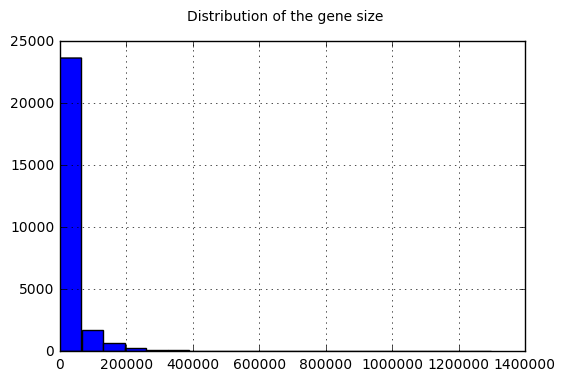

In [33]:
genes["gene_size"].hist(bins=20)
pl.suptitle("Distribution of the gene size")

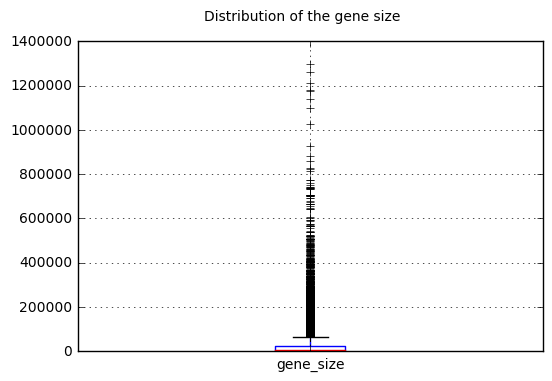

In [35]:
genes.boxplot(column="gene_size", return_type="axes")
pl.suptitle("Distribution of the gene size")

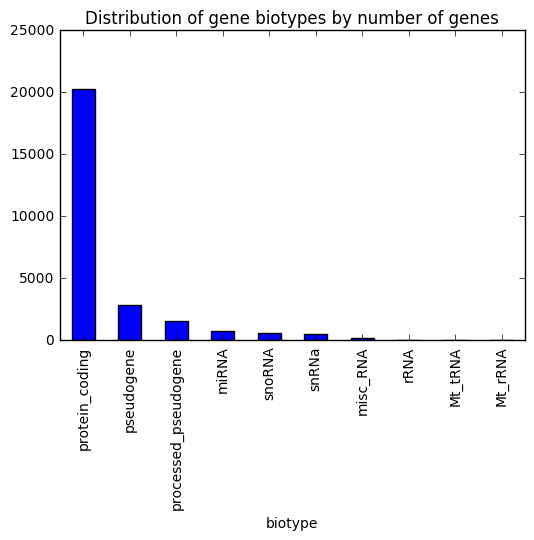

In [109]:
my_plot = table_of_incidence_genes.plot(kind='bar', legend=None, title="Distribution of gene biotypes by number of genes")

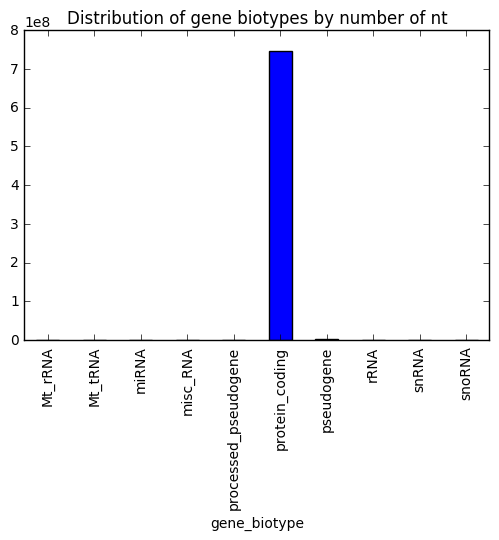

In [74]:
my_plot = incidence_of_biotypes_nt.plot(kind='bar', legend=None, title="Distribution of gene biotypes by number of nt")

![](https://s-media-cache-ak0.pinimg.com/736x/2d/42/04/2d4204a03a6dc4562b3dfb9e2e522dd6.jpg)